In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/img_align_celeba.zip -d /content/drive/MyDrive/GANs/img_align_celeba/

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: /content/drive/MyDrive/GANs/img_align_celeba/img_align_celeba/197600.jpg  
  inflating: /content/drive/MyDrive/GANs/img_align_celeba/img_align_celeba/197601.jpg  
  inflating: /content/drive/MyDrive/GANs/img_align_celeba/img_align_celeba/197602.jpg  
  inflating: /content/drive/MyDrive/GANs/img_align_celeba/img_align_celeba/197603.jpg  
  inflating: /content/drive/MyDrive/GANs/img_align_celeba/img_align_celeba/197604.jpg  
  inflating: /content/drive/MyDrive/GANs/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: /content/drive/MyDrive/GANs/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: /content/drive/MyDrive/GANs/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: /content/drive/MyDrive/GANs/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: /content/drive/MyDrive/GANs/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: /content/drive/MyDrive/GANs/img_align_celeba/img_align_celeb

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [ ]:
directory = '/content/drive/MyDrive/GANs/img_align_celeba/img_align_celeba'

# Get all images from dir
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory=directory,
    color_mode='rgb',
    batch_size=128,
    image_size=(32, 32),
    label_mode=None,
    shuffle=True,
    seed=42,
)

# Normalize the data
dataset = dataset.map(lambda x: x / 255.0)

Found 202599 files belonging to 1 classes.


In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

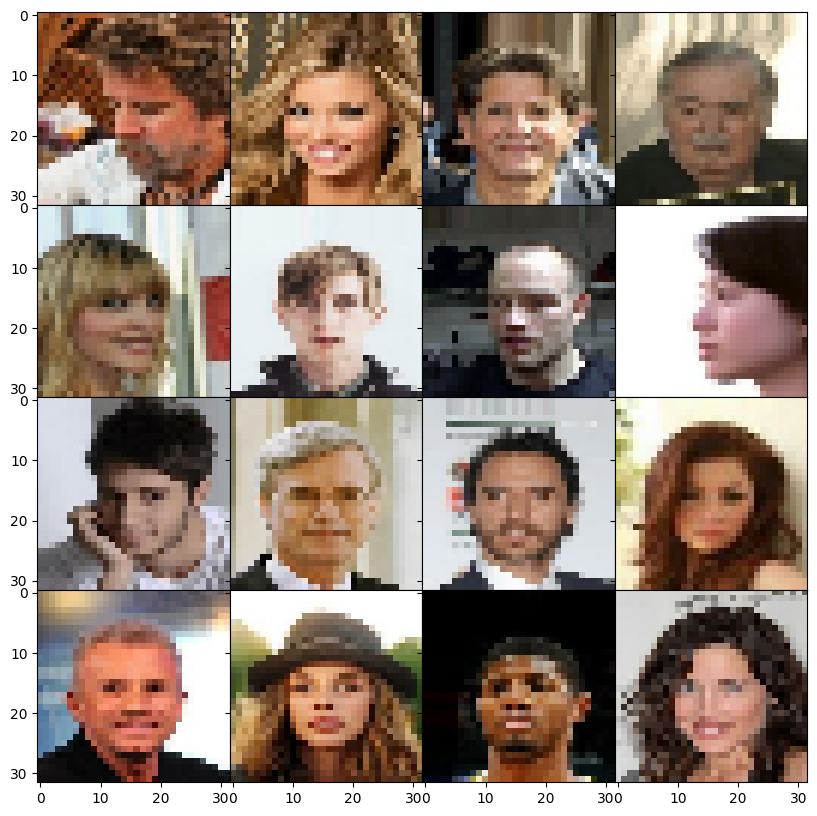

In [ ]:
it=iter(dataset)
one_batch = next(it).numpy()
images = one_batch[:16,:,:,:]

# show the image

fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4,4),
         axes_pad=0)
for ax,im in zip(grid, images):
    ax.imshow(im)
plt.show()

In [ ]:
from tensorflow.keras.layers import Conv2D, LeakyReLU,BatchNormalization, Dropout, Flatten, Dense, Activation, Reshape
from tensorflow.keras import Model, Input

def discriminator_model():
    disc_input = Input(shape=(32,32,3), name='discriminator_network')
    x=Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same')(disc_input)
    x=LeakyReLU()(x)
    x=Dropout(0.2)(x)

    x=Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same')(x)
    x=LeakyReLU()(x)
    x=Dropout(0.2)(x)

    x=Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same')(x)
    x=LeakyReLU()(x)
    x=Dropout(0.2)(x)

    x=Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same')(x)
    x=LeakyReLU()(x)
    x=Dropout(0.2)(x)

    x=Flatten()(x)
    x=Dense(1)(x)

    output = Activation('sigmoid')(x)

    disc=Model(inputs = disc_input, outputs=output)

    return disc

In [ ]:
disc_model = discriminator_model()
disc_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 discriminator_network (Inp  [(None, 32, 32, 3)]       0         
 utLayer)                                                        
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 64)        0         
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                             

In [ ]:
from tensorflow.keras.layers import Conv2D, LeakyReLU,BatchNormalization, Dropout, Flatten, Dense, Activation, Reshape, Conv2DTranspose
from tensorflow.keras import Model, Input
def generator_model(z_dim=100):
    gen_input = Input(shape=(z_dim), name='generator_network')

    x = Dense(8*8*3)(gen_input)
    x = Reshape(target_shape=(8,8,3))(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(filters=512, kernel_size=3, strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(filters=256, kernel_size=3, strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(filters=128, kernel_size=3, strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(filters=128, kernel_size=3, strides=(2,2), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)


    x = Conv2DTranspose(filters=64, kernel_size=3, strides=(1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(filters=3, kernel_size=3, strides=(1,1), padding='same')(x)
    fake_images_gen = LeakyReLU()(x)

    model_gen=Model(inputs = gen_input, outputs=fake_images_gen)

    return model_gen

In [ ]:
gen_model = generator_model()

In [ ]:
gen_model.summary(0)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 generator_network (InputLa  [(None, 100)]             0         
 yer)                                                            
                                                                 
 dense_1 (Dense)             (None, 192)               19392     
                                                                 
 reshape (Reshape)           (None, 8, 8, 3)           0         
                                                                 
 batch_normalization (Batch  (None, 8, 8, 3)           12        
 Normalization)                                                  
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 8, 8, 3)           0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 512)         1433

In [ ]:
disc_model = discriminator_model()
gen_model = generator_model()
# Image Classification CNN
# Compile the model that trains disc.
disc_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# Compile the model that trains generator
z_dim = 100
disc_model.trainable = False
model_input = Input(shape=(z_dim), name='model_input')
model_output = disc_model(gen_model(model_input))

model = Model(model_input, model_output)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_input (InputLayer)    [(None, 100)]             0         
                                                                 
 model_3 (Functional)        (None, 32, 32, 3)         1736143   
                                                                 
 model_2 (Functional)        (None, 1)                 297281    
                                                                 
Total params: 2033424 (7.76 MB)
Trainable params: 1733961 (6.61 MB)
Non-trainable params: 299463 (1.14 MB)
_________________________________________________________________


In [ ]:
def train_discriminator(batch, batch_size):
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    disc_model.train_on_batch(batch, valid)

    noise = np.random.normal(0,1, (batch_size, z_dim))
    gen_image = gen_model.predict(noise)
    disc_model.train_on_batch(gen_image, fake)
def train_generator(batch_size):
    valid = np.ones((batch_size, 1))
    noise = np.random.normal(0,1, (batch_size, z_dim))
    model.train_on_batch(noise, valid)

In [ ]:
def save_image(fake_image, path):
    image = tf.keras.preprocessing.image.array_to_img(fake_image.numpy())
    tf.keras.preprocessing.image.save_img(path, image)
    return image
def generate_and_save_image(path):
    noise = np.random.normal(0,1, (1, z_dim))
    fake_images = gen_model(noise)
    image = save_image(fake_images[0], path)
    plt.imshow(image)
    plt.show()

No of Epochs-> 0
4/4 [==============================] - 4s 914ms/step
Batch Images-> 0


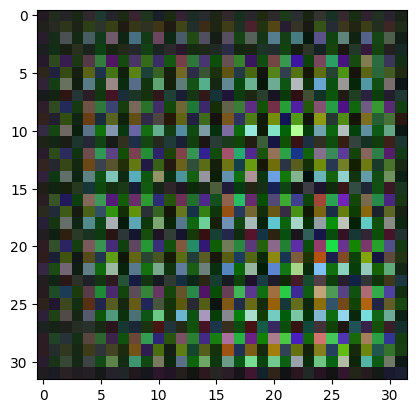

4/4 [==============================] - 3s 644ms/step
Batch Images-> 100


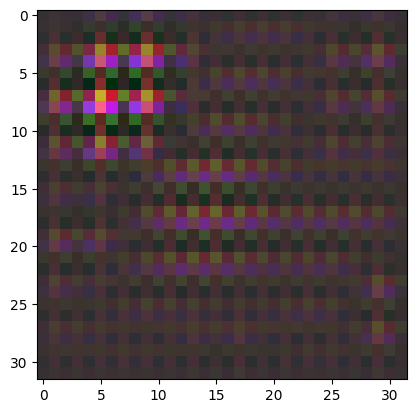

4/4 [==============================] - 2s 495ms/step
Batch Images-> 200


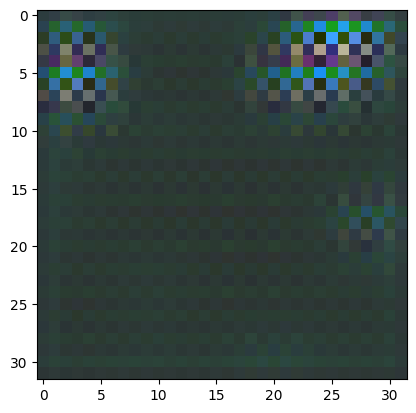

4/4 [==============================] - 3s 526ms/step
Batch Images-> 300


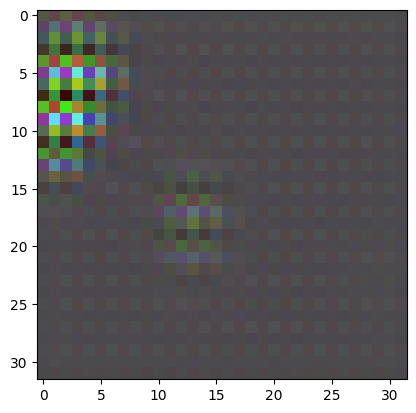

4/4 [==============================] - 3s 754ms/step
Batch Images-> 400


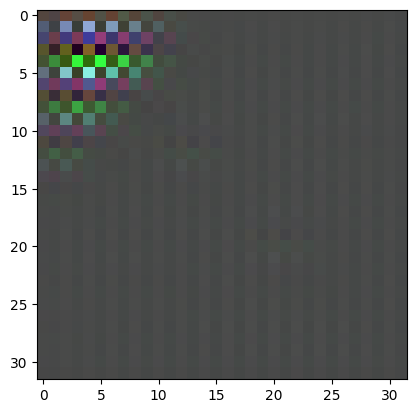

4/4 [==============================] - 3s 897ms/step
Batch Images-> 500


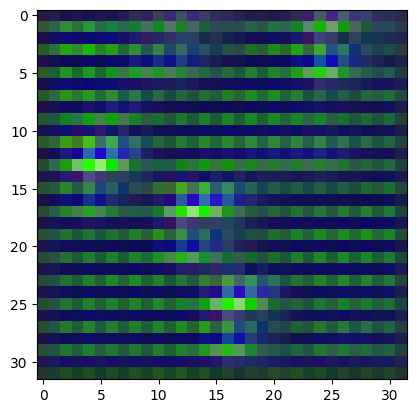

4/4 [==============================] - 2s 592ms/step
Batch Images-> 600


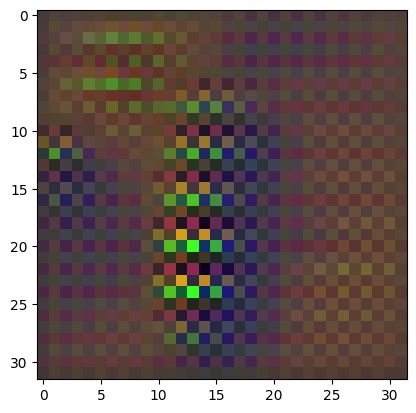

4/4 [==============================] - 2s 362ms/step
Batch Images-> 700


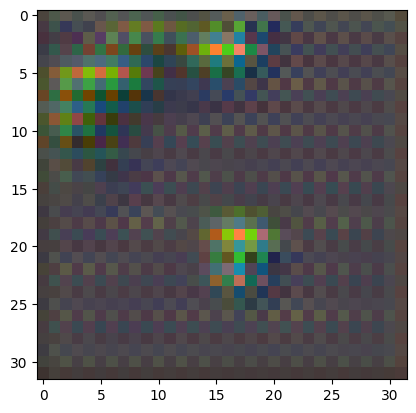

4/4 [==============================] - 2s 366ms/step
Batch Images-> 800


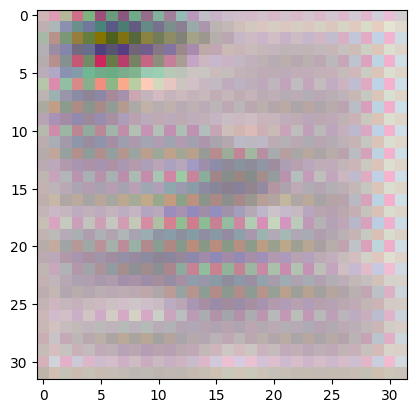

4/4 [==============================] - 2s 371ms/step
Batch Images-> 900


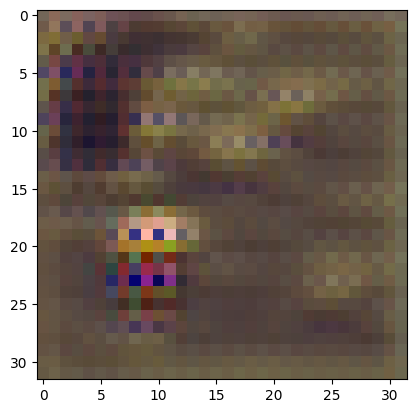

4/4 [==============================] - 2s 360ms/step
Batch Images-> 1000


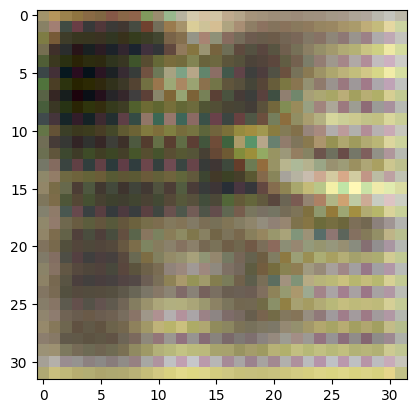

4/4 [==============================] - 3s 606ms/step
Batch Images-> 1100


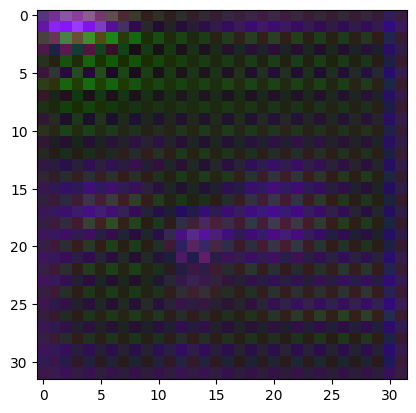

4/4 [==============================] - 2s 376ms/step
Batch Images-> 1200


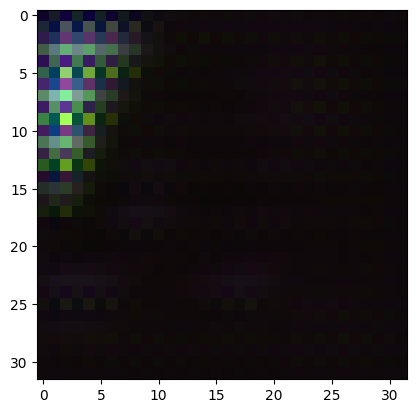

4/4 [==============================] - 2s 361ms/step
Batch Images-> 1300


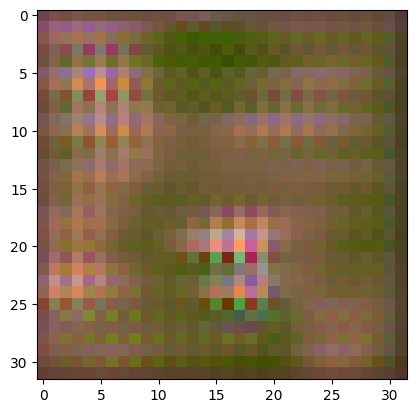

4/4 [==============================] - 2s 463ms/step
Batch Images-> 1400


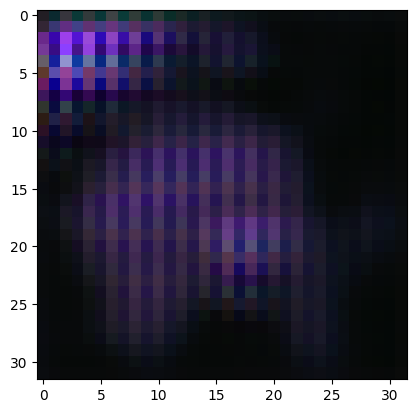

4/4 [==============================] - 2s 361ms/step


KeyboardInterrupt: 

In [ ]:
for epochs in range(10):
    print(f'No of Epochs-> {epochs}')
    for i,batch in enumerate(dataset):
        train_discriminator(batch, batch.shape[0])
        train_generator(batch.shape[0])
        if i%100==0:
            print(f'Batch Images-> {i}')
            PATH = '/content/drive/MyDrive/GANs/generate_face'
            generate_and_save_image(path = f'{PATH}/epochs_{epochs}batch_{i}.jpg')